In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv


# Extreme Gradient Boosting (XGBoost)

1. XGBoost is one of the fastest implementations of gradient    boosted trees. It does this by tackling one of the major      inefficiencies of gradient boosted trees.

2. Consider the case where there are thousands of features,      and therefore thousands of possible splits. Now, if we        consider the potential loss for all possible splits to        create a new branch we have thousands of potential splits    and losses.

3. XGBoost tackles this inefficiency by looking at the          distribution of features across all data points in a leaf    and using this information to reduce the search space of      possible feature splits.

4.  Although XGBoost implements a few regularization tricks,      this speed up is by far the most useful feature of the        library, allowing many hyperparameter settings to be          investigated quickly.

5.   This is helpful because there are many hyperparameters        to tune which are designed to limit overfitting.

# Read the Dataset

In [164]:
df = pd.read_csv('/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv')

In [165]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Exploratory Data Analysis (EDA)

In [166]:
df.shape

(440, 8)

In [167]:
# check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


* check summary statistics of dataset

In [168]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [169]:
round(df.corr(),3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000,0.062,-0.169,0.461,0.609,-0.202,0.636,0.056
Region,0.062,1.000,0.055,0.032,0.008,-0.021,-0.001,0.045
Fresh,-0.169,0.055,1.000,0.101,-0.012,0.346,-0.102,0.245
Milk,0.461,0.032,0.101,1.000,0.728,0.124,0.662,0.406
Grocery,0.609,0.008,-0.012,0.728,1.000,-0.040,0.925,0.205
Frozen,-0.202,-0.021,0.346,0.124,-0.040,1.000,-0.132,0.391
Detergents_Paper,0.636,-0.001,-0.102,0.662,0.925,-0.132,1.000,0.069
Delicassen,0.056,0.045,0.245,0.406,0.205,0.391,0.069,1.000


In [170]:
df['Channel'].unique()

array([2, 1])

* check the missing values in dataset

In [171]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Declare feature vector and target variable

In [172]:
x = df.drop(['Channel'],axis=1)
y = df['Channel']

* Now, let's take a look at feature vector(X) and target variable(y).

In [173]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [174]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

* Here we can that the y label contain values as 1 and 2.
* We will need to convert it into 0 and 1 for further           analysis.


In [175]:
# convert labels into binary values

y[y == 2] = 0
y[y == 1] = 1

In [176]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

* Now, we will convert the data set into an optimized data 
  structure called Dmatrix that XGBoost supports and gives it 
  acclaimed performance and efficiency gains.

In [177]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data = x, label= y)

# Split data into separate training and test set

In [178]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the XGBoost Classifier

* In order to train the XGBoost classifier, we need to know 
  different parameters that XGBoost provides.
* we will discuss these parameters in the next kernel.

In [179]:
# import xgb classifier
from xgboost import XGBClassifier

# declare parameters
params = {'objective':'binary:logistic','maxdepth':4,'learning_rate':1.0,'n_estimators':100}

# instantiate the classifier
xgb_clf = XGBClassifier(**params)

# fit the classsifier to the training data
xgb_clf.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:12:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [180]:
# we can view the parameters of the xgb trained model as follows -
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


# Make predictions with XGBoost Classifier

In [181]:
# make predictions on the test data
y_pred = xgb_clf.predict(x_test)

# Check accuracy score

In [182]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score : {:.4f}'.format(accuracy_score(y_test,y_pred)))

XGBoost model accuracy score : 0.8939


* we can see that XGBoost obtain very high accuracy score of     91.67%

# k-fold cross validation using XGBoost 

To build more robust models with XGBoost, we should always perform k-fold cross validation.

In this way, we ensure that the original training dataset is used for both training and validation.

Also, each entry is used for validation just once.

XGBoost supports k-fold cross validation using the cv() method.

In this method, we will specify several parameters which are as follows:-

nfolds - This parameter specifies the number of cross-validation sets we want to build.

num_boost_round - It denotes the number of trees we build.

metrics - It is the performance evaluation metrics to be considered during CV.

as_pandas - It is used to return the results in a pandas DataFrame.

early_stopping_rounds - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

seed - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [183]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

* xgb_cv contains train and test auc metrics for each boosting round.
* let's preview xgb_cv.

In [184]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.916130,0.017352,0.883424,0.031286
1,0.916677,0.017711,0.884176,0.031818
2,0.942047,0.010679,0.921339,0.004898
3,0.959857,0.004367,0.947506,0.010233
4,0.963008,0.002962,0.944536,0.010897


# Feature importance with XGBoost

XGBoost provides a way to examine the importance of each feature in the original dataset within the model.

It involves counting the number of times each feature is split on across all boosting trees in the model.

Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

XGBoost has a plot_importance() function that helps us to achieve this task.

Then we can visualize the features that has been given the highest important score among all the features.

Thus XGBoost provides us a way to do feature selection.

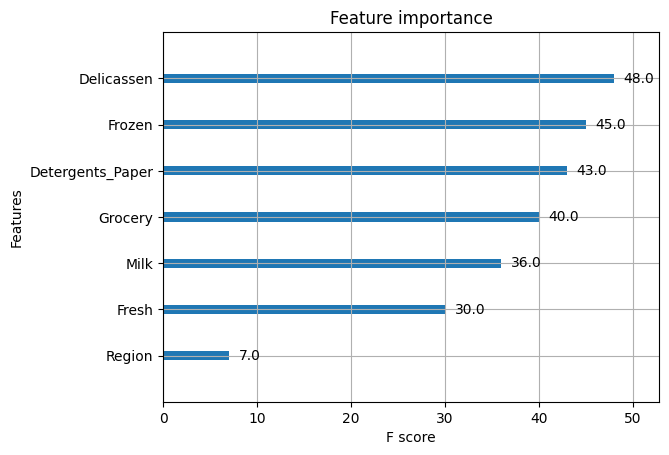

<Figure size 1600x1200 with 0 Axes>

In [185]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16,12))
plt.show()

We can see that the feature Delicassesn has been given the highest importance score among all the features.

Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

Thus XGBoost also gives us a way to do feature selection.

# Results and conclusion

* In this kernel, we implement XGBoost with Python and      Scikit-   Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

* The y labels contain values as 1 and 2. We have converted them into 0 and 1 for further analysis.

* We have trained the XGBoost classifier and found the accuracy score to be 89.39%.
 
* We have performed k-fold cross-validation with XGBoost.

* We have find the most important feature in XGBoost. We did it using the plot_importance() function in XGBoost that helps us to achieve this task.